<a href="https://colab.research.google.com/github/prateekshapm/machine_learning/blob/main/29_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***MULTIVARIENT LINEAR REGRESSION***

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/new.xlsx')

# in this line we reassign the value of the variable df to be an array whose entries were the previous entries...
# ...of the dataframe df
df = df.values
y = df[:, 0]
x1 = df[:, 1]
x2 = df[:, 2]
x3 = df[:, 3]
#row_1 = df[0, :]
#row_2 = df[1, :]

print("y :" ,y)
print("x1 :",x1)
print("x2 :",x2)
print("x3 :",x3)
x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
x3=x3.reshape(-1,1)
x=np.array([x1,x2,x3])

y : [  1   2   4 655  58  12   8]
x1 : [231 332  23 887  88  70   2]
x2 : [324 244  33 220   9  29  23]
x3 : [3243  342 4423    1  256    4   30]


mse:  8333.441703265822 14826.409714725907 45692.796612882055
INTERCEPT : -60.58811170497121 41.871225898334785 154.46870310828893
slpoe : [0.71287004] [0.50669095] [-0.04112314]


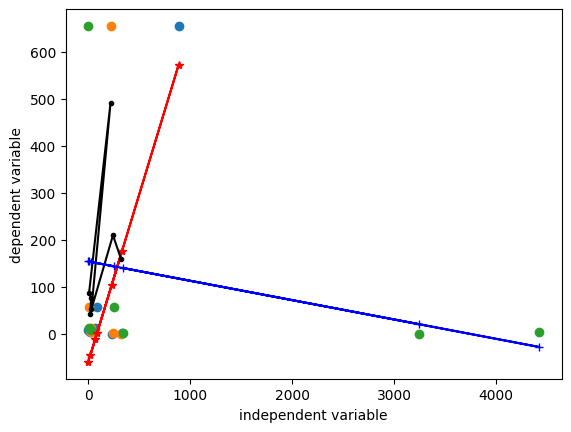

In [40]:
plt.scatter(x1,y)
plt.scatter(x2,y)
plt.scatter(x3,y)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
from sklearn.linear_model import LinearRegression
slr1=LinearRegression()
slr1.fit(x1,y)
slr2=LinearRegression()
slr2.fit(x2,y)
slr3=LinearRegression()
slr3.fit(x3,y)
pred1=slr1.predict(x1)
pred2=slr2.predict(x1)
pred3=slr3.predict(x3)
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y,pred1)
mse2=mean_squared_error(y,pred2)
mse3=mean_squared_error(y,pred3)
print("mse: ",mse1,mse2,mse3)
print("INTERCEPT :" ,slr1.intercept_,slr2.intercept_,slr3.intercept_)
print("slpoe :",slr1.coef_,slr2.coef_,slr3.coef_)
plt.plot(x1,pred1,color='red',marker='*')
plt.plot(x2,pred2,color='black',marker='.')
plt.plot(x3,pred3,color='blue',marker='+')

x : [45  1 14]
y : [88 22 78]
mse:  280.41269841269843
INTERCEPT : 36.95238095238095
slpoe : [1.28571429]


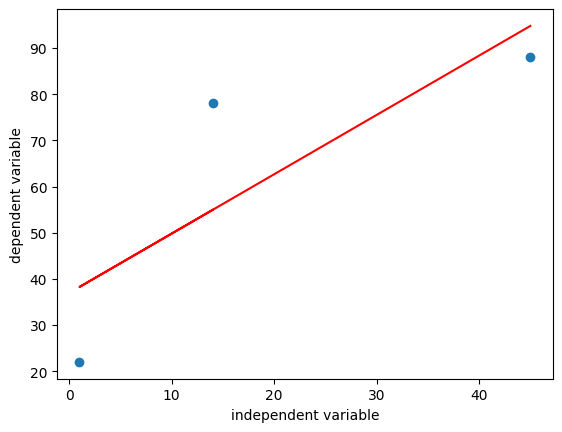

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('/content/new1.xlsx')

# in this line we reassign the value of the variable df to be an array whose entries were the previous entries...
# ...of the dataframe df
df = df.values
x = df[:, 0]
y = df[:, 1]
#row_1 = df[0, :]
#row_2 = df[1, :]

print("x :",x)
print("y :" ,y)
x=x.reshape(-1,1)
plt.scatter(x,y)
plt.xlabel("independent variable")
plt.ylabel("dependent variable")
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(x,y)
pred=slr.predict(x)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,pred)
print("mse: ",mse)
print("INTERCEPT :" ,slr.intercept_)
print("slpoe :",slr.coef_)
plt.plot(x,pred,color='red')

## ***GRADIENT DECENT OF LINEAR REGRESSION***

100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??Y
200 epochs elapsed
Current accuracy is : 0.9876439126076564
Do you want to stop (y/*)??*
300 epochs elapsed
Current accuracy is : 0.99066471424142
Do you want to stop (y/*)??NO
400 epochs elapsed
Current accuracy is : 0.9929469938640652
Do you want to stop (y/*)??YES
500 epochs elapsed
Current accuracy is : 0.9946713044635174
Do you want to stop (y/*)??y


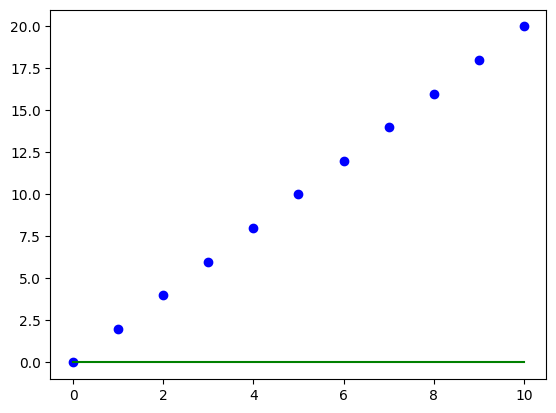

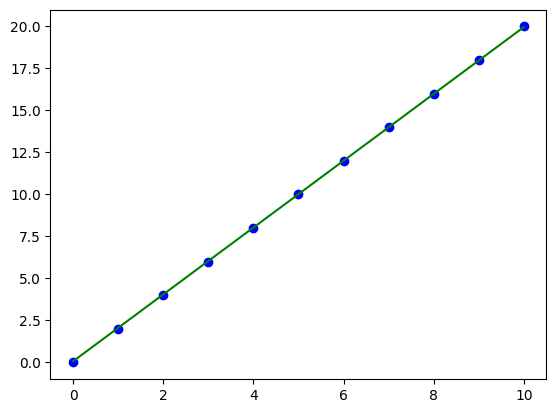

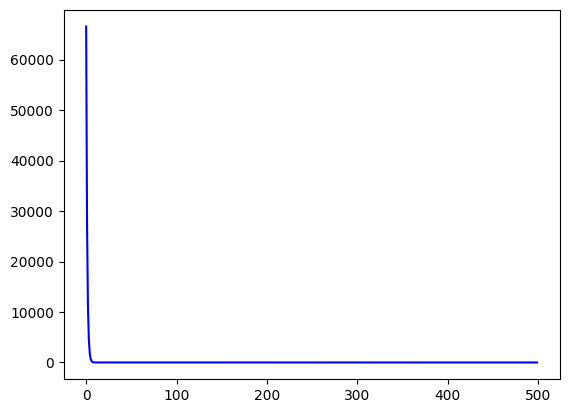

In [41]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt


class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0]

	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
												np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
												np.sum((Y_pred - Y) * self.X)))

	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X:
			X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

		return Y_pred

	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	# def predict(self, b, yi):

	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
		return J

	def plot_best_fit(self, Y_pred, fig):
		f = plt.figure(fig)
		plt.scatter(self.X, self.Y, color='b')
		plt.plot(self.X, Y_pred, color='g')
		f.show()


def main():
	X = np.array([i for i in range(11)])
	Y = np.array([2*i for i in range(11)])

	regressor = Linear_Regression(X, Y)

	iterations = 0
	steps = 100
	learning_rate = 0.01
	costs = []

	# original best-fit line
	Y_pred = regressor.predict()
	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

	while 1:
		Y_pred = regressor.predict()
		cost = regressor.compute_cost(Y_pred)
		costs.append(cost)
		regressor.update_coeffs(learning_rate)

		iterations += 1
		if iterations % steps == 0:
			print(iterations, "epochs elapsed")
			print("Current accuracy is :",
				regressor.get_current_accuracy(Y_pred))

			stop = input("Do you want to stop (y/*)??")
			if stop == "y":
				break

	# final best-fit line
	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

	# plot to verify cost function decreases
	h = plt.figure('Verification')
	plt.plot(range(iterations), costs, color='b')
	h.show()

	# if user wants to predict using the regressor:
	regressor.predict([i for i in range(10)])


if __name__ == '__main__':
	main()


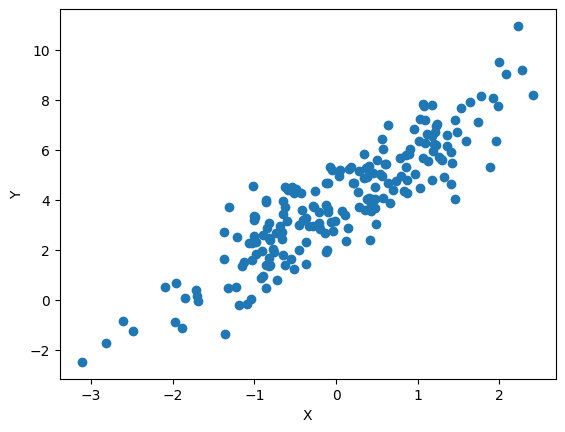

initial weight : [-4.38415158e-01 -1.18735690e+00  4.13373028e-01  1.89510769e-01
 -1.83505168e+00  9.67654488e-01  1.61096100e+00 -1.08820255e+00
  1.43103266e+00  1.71951274e+00 -9.86841734e-01  1.25847579e+00
 -1.46413332e+00 -1.03347047e-01  1.57303108e+00  4.06321147e-01
 -7.08259557e-01 -3.45402410e-01 -5.74857962e-01 -4.76592056e-01
 -1.35648692e+00 -6.48670231e-01 -3.23837595e-01  1.57596457e-01
  2.00884986e-01  1.01443039e+00 -2.53229037e-01 -7.07518324e-01
 -1.36864126e+00  1.40783264e+00 -2.43646481e+00 -7.63218266e-01
  9.09186010e-01  8.78506702e-02  2.10300942e-02  4.89587854e-01
  1.43849687e+00  1.27134753e+00  1.37084218e+00  9.47954045e-02
  2.39983148e-01  2.28201646e-01 -1.56357817e+00  2.29066230e-01
  7.05523106e-01  3.83957446e-02  9.30216843e-01  2.67708954e-01
 -1.69885452e-01  1.76923261e+00 -1.84046132e+00 -2.47802206e+00
  2.49610558e+00  3.42470007e-01 -1.05744716e+00  9.17981430e-01
 -7.24122793e-01 -2.57325205e-01 -9.41104791e-01 -1.60754165e-01
 -1.2777

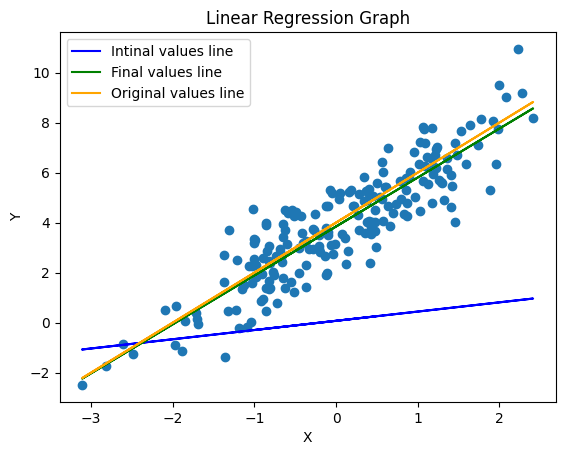

In [52]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random
a = 4 # height
b = 2 # slope

# generate data
N = 200 # sample size
X = normal(loc=0.0, scale=1.0, size=N)
W = normal(loc=0.0, scale=1.0, size=N)
Y = a + b*X + W

# plot data
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print("initial weight :",W)
#A function that calculates the mean squared error for
# given values of X and Y with parameters w1 and w2

def mean_square_error(X, Y, w1, w2):
    n = len(X)
    total_error = 0

    #running the loop for total numer of samples in dataset
    for i in range(n):
        #calculating the error value as given in the
        # above formula in statement (a)
        total_error = total_error + (w1 + w2 * X[i] - Y[i]) ** 2

    #Since this is a mean error, dividing the total error
    # calculated by total number of samples
    mse = total_error / n
    return mse
    #A function that calculates the Gradient/partial derivative of MSE
#We use partial derivatives to find how each individual parameter (w1 and w2)
# affects MSE and to update the values of w1 and w2
def gradient_mean_square_error(X, Y, w1, w2):
    n = len(X)
    partial_derivative_w1 = 0
    partial_derivative_w2 = 0

    #calculate the mse partial derivatives of w1 and w2
    # for number of samples in the dataset as we calculated them above
    for i in range(n):
        partial_derivative_w1 += 2 * (w1 + w2 * X[i] - Y[i])
        partial_derivative_w2 += 2 * (w1 + w2 * X[i] - Y[i]) * X[i]

    #take the mean of w1 and w2 vals
    partial_derivative_w1 = partial_derivative_w1 / n
    partial_derivative_w2 = partial_derivative_w2 / n

    return partial_derivative_w1 , partial_derivative_w2
    #This function implements the gradient descent algorithm
def gradient_descent(X, Y, w1, w2, learning_rate, num_iterations):

    mse_list = []

    for i in range(num_iterations):
        #We use our gradient_mean_square_error to
        # calculate partial derivatives of w1 and w2 and update them
        partial_derivative_w1, partial_derivative_w2 = gradient_mean_square_error(X, Y, w1, w2)
        w1 -= learning_rate * partial_derivative_w1
        w2 -= learning_rate * partial_derivative_w2

        mse_list.append(mean_square_error(X, Y, w1, w2))
    #return the final calculated derivatives
    return w1, w2 ,mse_list
    #Generate random value for w1 and w2 between 0 and 1
initial_w1 = random.uniform(0, 1)
initial_w2 = random.uniform(0, 1)

#define the learning rate and no of iterations we need to calculate
learning_rate = 0.1
iterations = 1000

# Perform gradient descent using our implemented gradient descent function
final_w1, final_w2,mse_final_list = gradient_descent(X, Y, initial_w1, initial_w2, learning_rate, iterations)

#Print the original and new calculated values of a and b
print("Original value a = ", a , " New calculated value w1 = ",final_w1)
print("Original value b = ", b , " New calculated value w1 = ",final_w2)
def predict(Y,X,w1,w2):
    Y_pred = []
    for x in X:
        val = w2*x + w1
        Y_pred.append(val)
    return Y_pred
    plt.figure(figsize=(10, 10))

# plot data as given above
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y,X,initial_w1,initial_w2)
# plot line graph using intital values of w1 and w2
plt.plot(X, get_preds, color='b' ,label = "Intinal values line")

get_preds = predict(Y,X,final_w1,final_w2)
# plot line graph using final values of w1 and w2
plt.plot(X, get_preds, color='g', label = "Final values line")

get_preds = predict(Y,X,a,b)
# plot line graph using final values of a and b
plt.plot(X, get_preds, color='orange', label = "Original values line")

#Plot the grpah
plt.title("Linear Regression Graph")
plt.legend()
plt.show()

## ***2.***

initial w : [-6.30869135e-01  3.70839630e-01 -5.00221899e-01  1.03292016e+00
  1.19551467e+00 -1.60682750e+00 -6.77916159e-01  1.13876124e-03
  1.53710039e+00  8.71301007e-01 -1.74671878e+00 -1.50317277e-01
  1.22033360e+00 -3.81418875e-01 -8.45996620e-01  1.39951764e+00
  8.33902228e-01  1.16525322e+00 -4.42577714e-02  1.48964561e+00
 -2.16063346e-01 -8.17811102e-01  3.29945223e+00  5.53649702e-01
 -8.10855562e-01 -2.31420704e-01  3.72408906e-01 -1.63033323e-01
  2.35706336e-01  7.88402035e-01 -5.45191263e-01 -1.05709546e+00
 -1.45797999e-02 -1.83074356e+00 -6.96030976e-01 -7.40738561e-01
 -5.32393910e-01  2.78453402e-01  5.27594639e-01  2.26867619e-01
 -6.91762071e-01  2.62707980e-01  3.19149731e-02 -1.14478080e+00
 -2.46220098e+00  1.02189357e-01  4.52564492e-01  2.81634509e+00
  1.68760052e-02 -1.50197933e+00  9.93088216e-01  1.02287996e-01
  4.31398114e-01  1.28231486e+00 -1.13635513e+00  1.61360249e+00
  1.77371389e+00  1.14766043e+00  8.72979010e-01 -5.32448000e-01
  9.52151960e

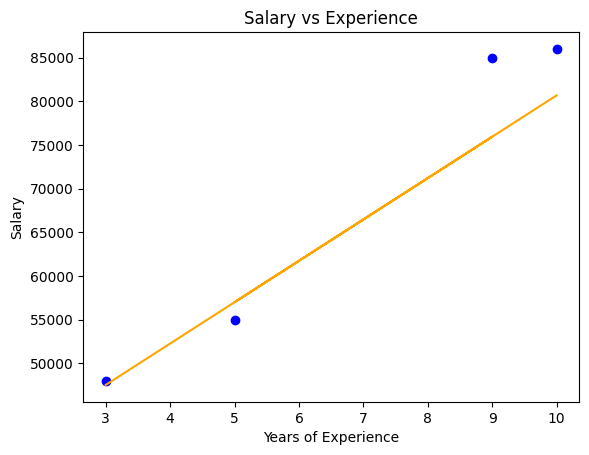

In [51]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Linear Regression

class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :

        self.learning_rate = learning_rate

        self.iterations = iterations

    # Function for model training

    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # weight initialization

        self.W = np.zeros( self.n )
        print("initial w :",W)

        self.b = 0

        self.X = X

        self.Y = Y


        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients

        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights

        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )

    def predict( self, X ) :

        return X.dot( self.W ) + self.b


# driver code

def main() :

    # Importing dataset

    df = pd.read_csv( "new1.csv" )

    X = df.iloc[:,:-1].values

    Y = df.iloc[:,1].values

    # Splitting dataset into train and test set

    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )

    # Model training

    model = LinearRegression( iterations = 1000, learning_rate = 0.01 )

    model.fit( X_train, Y_train )

    # Prediction on test set

    Y_pred = model.predict( X_test )

    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )

    print( "Real values      ", Y_test[:3] )

    print( "Trained W        ", round( model.W[0], 2 ) )

    print( "Trained b        ", round( model.b, 2 ) )

    # Visualization on test set

    plt.scatter( X_test, Y_test, color = 'blue' )

    plt.plot( X_test, Y_pred, color = 'orange' )

    plt.title( 'Salary vs Experience' )

    plt.xlabel( 'Years of Experience' )

    plt.ylabel( 'Salary' )

    plt.show()

if __name__ == "__main__" :

    main()